In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import io
file_path = '/content/drive/My Drive/NCF: Philanthropic giving to Black communities in MA/Data and Documentation/Nonprofit Base Bundle and Grants Plus Bundle Data/BU_Spark_20240117.xlsx'
# Read the Excel file into a DataFrame
df_base_bundle = pd.read_excel(file_path, sheet_name='Base_bundle')
df_grants = pd.read_excel(file_path, sheet_name='Grants')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
african_code = 'PE030000'
latin_american_code = 'PE050000'

filtered_df = df_base_bundle[df_base_bundle['pcs_population'].str.contains(african_code) | df_base_bundle['pcs_population'].str.contains(latin_american_code)]
filtered_grants_df = df_grants[df_grants['recip_population_code'].str.contains(african_code) | df_grants['recip_population_code'].str.contains(latin_american_code)]

In [ ]:
# Total Revenue
revenue_by_organization = filtered_df[['organization_name','total_revenue']]
revenue_by_organization

,organization_name,total_revenue
19491,Casa Latina Inc,18211.0
19694,African Bridge Network,94623.0
19891,Haitian American Business Expo Inc,72345.0
19892,Haitian American Business Expo Inc,74238.0
19994,Robbins House Inc,88100.0
...,...,...
62746,Boston Senior Home Care Inc,46611722.0
62760,Project Step Inc Symphony Hall,1064600.0
62843,Full Steam Forward Inc,1265399.0
62856,Mision De Caridad,126790.0


In [ ]:
# Total Contribution
total_amount_per_organization = filtered_grants_df.groupby('gm_name')['amount_usd'].sum()
total_amount_per_organization

gm_name
1772 Foundation Inc                                                 50000
4POINT0 SCHOOLS                                                     10000
A.C. Ratshesky Foundation                                           30000
AARP                                                                 9000
ALBERTSONS COMPANIES FOUNDATION                                     25000
                                                                    ...  
Yale Charitable Foundation                                           6000
Yawkey Foundation II                                               671000
Yum Brands Foundation Inc                                          250000
Zell Family Foundation Inc C/o Loring Wolcott & Coolidge Office      5000
Zoe's Best Friend Inc                                                5000
Name: amount_usd, Length: 573, dtype: int64

In [ ]:
# Grant recipients
grant_recipients = df_grants[['recip_name', 'recip_city']].drop_duplicates()

In [ ]:
# Financial status
financial_status = filtered_df[['organization_name','total_assets_eoy', 'total_revenue', 'active_status']].drop_duplicates()
financial_status.head()

,organization_name,total_assets_eoy,total_revenue,active_status
19491,Casa Latina Inc,62839.0,18211.0,Inactive
19694,African Bridge Network,22472.0,94623.0,Active
19891,Haitian American Business Expo Inc,20866.0,72345.0,Active
19892,Haitian American Business Expo Inc,42618.0,74238.0,Active
19994,Robbins House Inc,90400.0,88100.0,Active


In [ ]:
# Subject focus areas
filtered_subject_focus_filter = pd.DataFrame({"organization_name":filtered_df["organization_name"],"pcs_subject":filtered_df["pcs_subject"]})
filtered_subject_focus_filter.head()

,organization_name,pcs_subject
19491,Casa Latina Inc,SB070100 Basic and remedial instruction; SS000...
19694,African Bridge Network,SN030000 Community improvement
19891,Haitian American Business Expo Inc,SN060100 Business promotion
19892,Haitian American Business Expo Inc,SN060100 Business promotion
19994,Robbins House Inc,SA070400 History museums; SA090300 Historic pr...


In [ ]:
# Grant Recipient Comparison
unique_recipients = df_grants['recip_name'].unique()
print("There are",len(unique_recipients),"unique recipients")

unique_nonprofits = df_base_bundle['organization_name'].unique()
print("There are",len(unique_nonprofits),"unique nonprofits")

unique_black_nonprofits = filtered_df['organization_name'].unique()
print("There are",len(unique_black_nonprofits),"unique nonprofits catering towards the black community")

result = pd.Series(unique_recipients).isin(unique_nonprofits)
print(result.sum(), "nonprofits are recipients")

result = pd.Series(unique_black_nonprofits).isin(unique_nonprofits)
filtered_black_nonprofits = pd.Series(unique_black_nonprofits)[result]
print(result.sum(), "black nonprofits are recipients")
print(filtered_black_nonprofits)

There are 456 unique recipients
There are 22894 unique nonprofits
There are 129 unique nonprofits catering towards the black community
131 nonprofits are recipients
129 black nonprofits are recipients
0                               Casa Latina Inc
1                        African Bridge Network
2            Haitian American Business Expo Inc
3                             Robbins House Inc
4      Concerned Black Men of Massachusetts Inc
                         ...                   
124     Center for Public Interest Research Inc
125          Max Warburg Courage Curriculum Inc
126                 Boston Senior Home Care Inc
127                      Full Steam Forward Inc
128                             Love Your Magic
Length: 129, dtype: object


In [ ]:
contributions_african_latin = df_grants[df_grants['recip_population_code'].str.contains(african_code) | df_grants['recip_population_code'].str.contains(latin_american_code)].groupby('recip_name')['amount_usd'].sum()

# Function to check if any of the codes are excluded
def check_excluded_codes(codes):
    excluded_codes = [african_code, latin_american_code]
    # print(codes)
    if isinstance(codes, str):  # Check if codes is a string
        # print(codes)
        for code in codes.split(';'):  # Split the codes by semicolon
            if code.strip() in excluded_codes:  # Strip any leading/trailing whitespaces
                return True
    return False

contributions_other = df_grants[~df_grants['recip_population_code'].apply(lambda x: check_excluded_codes(x))].groupby('recip_name')['amount_usd'].sum()
print(contributions_other)

contributions_df = pd.DataFrame({
    'Contributions_African_Latin': contributions_african_latin,
    'Contributions_Other': contributions_other
}).fillna(0)

print(contributions_df)


recip_name
ACP Decisions                            175000
AFRICAN FOOD & PEACE FOUNDATION           19550
Abekam Inc                                25000
Actblue Charities Inc                      5000
Action for Equity Inc                      5000
                                          ...  
YOUTH DEVELOPMENT ORGANIZATION INC        17000
YWCA Boston, Inc.                           500
YWCA Northeastern Massachusetts Inc       75000
Youth Enrichment Services, Inc. (YES)       500
YouthBuild USA                           125000
Name: amount_usd, Length: 319, dtype: int64
                                       Contributions_African_Latin  \
recip_name                                                           
A Home 4 Everyone Inc                                       1000.0   
ACP Decisions                                                  0.0   
ACT Lawrence Inc.                                         144000.0   
AFRICAN FOOD & PEACE FOUNDATION                                0.0 

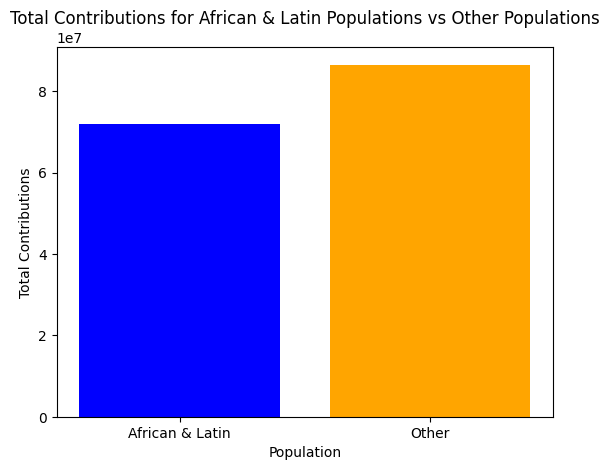

In [ ]:
import matplotlib.pyplot as plt

# Calculate total contributions for African and Latin American populations
total_contributions_african_latin = contributions_df['Contributions_African_Latin'].sum()

# Calculate total contributions for other populations
total_contributions_other = contributions_df['Contributions_Other'].sum()

# Create a bar chart
plt.bar(['African & Latin', 'Other'], [total_contributions_african_latin, total_contributions_other], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Total Contributions')
plt.title('Total Contributions for African & Latin Populations vs Other Populations')

# Show the plot
plt.show()

In [ ]:
# Creating a Bar Plot for showing Fiscal Year vs Total Contributions

import matplotlib.pyplot as plt

# Total Contribution
total_per_fiscal_year = filtered_grants_df.groupby(['fiscal_year'])['amount_usd'].sum().reset_index()
total_per_fiscal_year

plt.figure(figsize=(10, 6))
plt.bar(total_per_fiscal_year['fiscal_year'], total_per_fiscal_year['amount_usd'], color='skyblue')
plt.title('Total Contribution per Fiscal Year')
plt.xlabel('Fiscal Year')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()